In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install -q transformers
from transformers import BertTokenizer, BertModel
from transformers import pipeline
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
!pip install emoji==0.6.0
!pip install xformers


In [ ]:
data = pd.read_csv('sentiment_emotion_output_5000.csv')

In [ ]:
data.columns
data = data.head(5000)

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Index,DateReceived,Product,SubProduct,Issue,SubIssue,ConsumerComplaintNarrative,CompanyPublicResponse,...,SubmittedVia,DateSenttoCompany,CompanyResponseToConsumer,TimelyResponse,ConsumerDisputed,ComplaintID,sentiment_score,sentiment,polarity,Top_3_Emotions
0,0,0,0,2023-06-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,I purchased a vehicle from Regional Acceptance...,Company has responded to the consumer and the ...,...,Web,2023-06-24,Closed with explanation,Yes,NaN,7161475,"[{'label': 'NEG', 'score': 0.6890001893043518}]",NEG,0.689000,"[('neutral', 0.97782475), ('approval', 0.01251..."
1,1,1,1,2023-05-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not my account. I have never signed fo...,NaN,...,Web,2023-05-09,Closed with non-monetary relief,Yes,NaN,6955623,"[{'label': 'NEG', 'score': 0.8543744683265686}]",NEG,0.854374,"[('disapproval', 0.9325526), ('approval', 0.03..."
2,2,2,57,2023-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I submitted a letter to the 3 Credit Bureaus t...,Company has responded to the consumer and the ...,...,Web,2023-05-10,Closed with explanation,Yes,NaN,6957541,"[{'label': 'NEG', 'score': 0.8625348806381226}]",NEG,0.862535,"[('neutral', 0.9344382), ('approval', 0.035616..."
3,3,3,82,2023-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"When I reviewed my credit report, I discovered...",Company has responded to the consumer and the ...,...,Web,2023-05-10,Closed with explanation,Yes,NaN,6957291,"[{'label': 'NEU', 'score': 0.6669594645500183}]",NEU,0.666959,"[('realization', 0.9220555), ('neutral', 0.073..."
4,4,4,91,2023-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Public record information inaccurate,RE : Social Security XXXX I have recently been...,Company has responded to the consumer and the ...,...,Web,2023-05-10,Closed with explanation,Yes,NaN,6961963,"[{'label': 'NEU', 'score': 0.5375613570213318}]",NEU,0.537561,"[('disapproval', 0.8774936), ('neutral', 0.106..."


# Data Preparation


In [ ]:
data.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
data.columns = ['Index','DateReceived','Product','SubProduct','Issue','SubIssue','ConsumerComplaintNarrative','CompanyPublicResponse',
                'Company','State','ZIPCode','Tags','ConsumerConsentProvided','SubmittedVia','DateSenttoCompany',
                'CompanyResponseToConsumer','TimelyResponse','ConsumerDisputed','ComplaintID']

In [ ]:
data['ConsumerComplaintNarrative'].head()

0    I purchased a vehicle from Regional Acceptance...
1    This is not my account. I have never signed fo...
2    I submitted a letter to the 3 Credit Bureaus t...
3    When I reviewed my credit report, I discovered...
4    RE : Social Security XXXX I have recently been...
Name: ConsumerComplaintNarrative, dtype: object

In [ ]:
data['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    2846
Checking or savings account                                                      540
Debt collection                                                                  537
Credit card or prepaid card                                                      495
Mortgage                                                                         265
Vehicle loan or lease                                                            155
Money transfer, virtual currency, or money service                                89
Payday loan, title loan, or personal loan                                         54
Student loan                                                                      19
Name: Product, dtype: int64

In [ ]:
data['SubProduct'].value_counts()

Credit reporting                              2803
Checking account                               449
General-purpose credit card or charge card     376
Other debt                                     187
Conventional home mortgage                     156
Loan                                           135
I do not know                                  115
Credit card debt                               105
Store credit card                               87
Medical debt                                    64
FHA mortgage                                    50
Auto debt                                       44
Savings account                                 42
Other banking product or service                39
Other personal consumer report                  35
Installment loan                                32
Domestic (US) money transfer                    31
Mobile or digital wallet                        24
VA mortgage                                     24
General-purpose prepaid card   

In [ ]:
data['Issue'].value_counts()

Incorrect information on your report                                                1177
Problem with a credit reporting company's investigation into an existing problem     822
Improper use of your report                                                          819
Managing an account                                                                  309
Attempts to collect debt not owed                                                    262
                                                                                    ... 
Getting a loan                                                                         1
Getting a line of credit                                                               1
Confusing or misleading advertising or marketing                                       1
Can't contact lender or servicer                                                       1
Can't stop withdrawals from your bank account                                          1
Name: Issue, Length: 

In [ ]:
data['SubIssue'].value_counts()

Information belongs to someone else                         710
Reporting company used your report improperly               625
Their investigation did not fix an error on your report     561
Credit inquiries on your report that you don't recognize    181
Account information incorrect                               154
                                                           ... 
Problem with convenience check                                1
Problem with fees or penalties                                1
Problem with signing the paperwork                            1
Problem while selling or giving up the vehicle                1
Changes in terms mid-deal or after closing                    1
Name: SubIssue, Length: 135, dtype: int64

In [ ]:
product_issue_counts = data.groupby(['Product','Issue']).size().reset_index(name='Count')
top_ten_combinations = product_issue_counts.sort_values(by=['Count'],ascending=False).head(10)

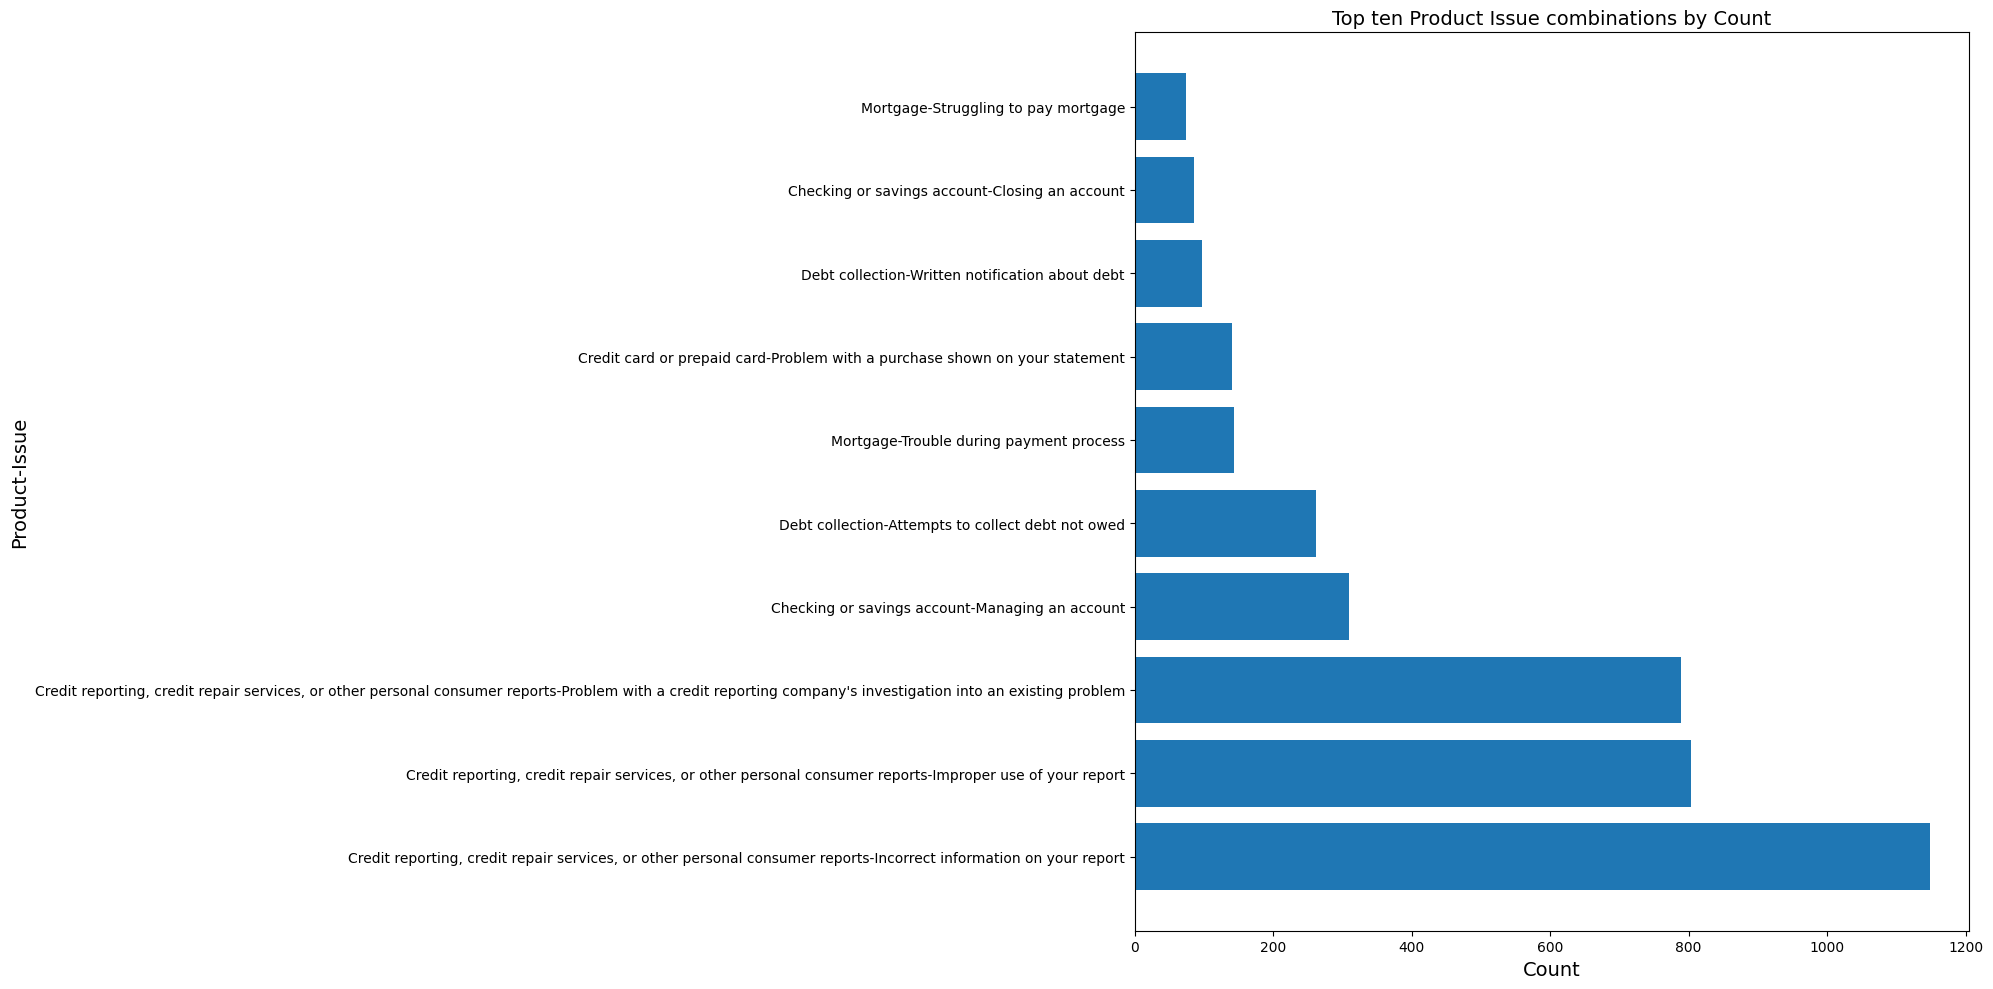

In [ ]:
plt.figure(figsize=(20,10))
bar_plot = plt.barh(top_ten_combinations['Product']+'-'+top_ten_combinations['Issue'],top_ten_combinations['Count'])
plt.xlabel('Count',fontsize=14)
plt.ylabel('Product-Issue',fontsize=14)
plt.title('Top ten Product Issue combinations by Count',fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
data_null=data['ConsumerComplaintNarrative'].isnull()
data_null.shape

(5000,)

In [ ]:
#find number of nulls in each column

missing_values_count = data.isnull().sum(axis=0)
missing_values_count

Index                            0
DateReceived                     0
Product                          0
SubProduct                       0
Issue                            0
SubIssue                       441
ConsumerComplaintNarrative       0
CompanyPublicResponse          845
Company                          0
State                           25
ZIPCode                          0
Tags                          4268
ConsumerConsentProvided          0
SubmittedVia                     0
DateSenttoCompany                0
CompanyResponseToConsumer        0
TimelyResponse                   0
ConsumerDisputed              5000
ComplaintID                      0
dtype: int64

Sentiment Analysis

In [ ]:
model_name="finiteautomata/bertweet-base-sentiment-analysis"
classifier = pipeline('sentiment-analysis', model=model_name)


In [ ]:
data['sentiment_score'] = data['ConsumerComplaintNarrative'].map(lambda text: classifier(text,truncation=True))

data['sentiment'] = data['sentiment_score'].str[0].str['label']
data['polarity'] = data['sentiment_score'].str[0].str['score']

In [ ]:
data.to_csv('sentiment_output_5000.csv')

#Emotion Analysis


In [ ]:

from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
import tensorflow as tf

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model_1 = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion_1 = pipeline('sentiment-analysis',
                    model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
def get_top_3_emotions(text):
    truncated_text = tokenizer(text, truncation=True, padding='longest', max_length=512, return_tensors="tf")
    input_ids = truncated_text["input_ids"]
    attention_mask = truncated_text["attention_mask"]
    outputs = model_1(input_ids, attention_mask=attention_mask)
    predicted_probabilities = tf.nn.softmax(outputs.logits, axis=1).numpy()[0]
    emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
                'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
                'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']
    top_3_emotions = sorted(zip(emotions, predicted_probabilities), key=lambda x: x[1], reverse=True)[:3]
    return top_3_emotions

In [ ]:
data['Top_3_Emotions'] = data['ConsumerComplaintNarrative'].apply(get_top_3_emotions)


In [ ]:
data.to_csv('sentiment_emotion_output_5000.csv')

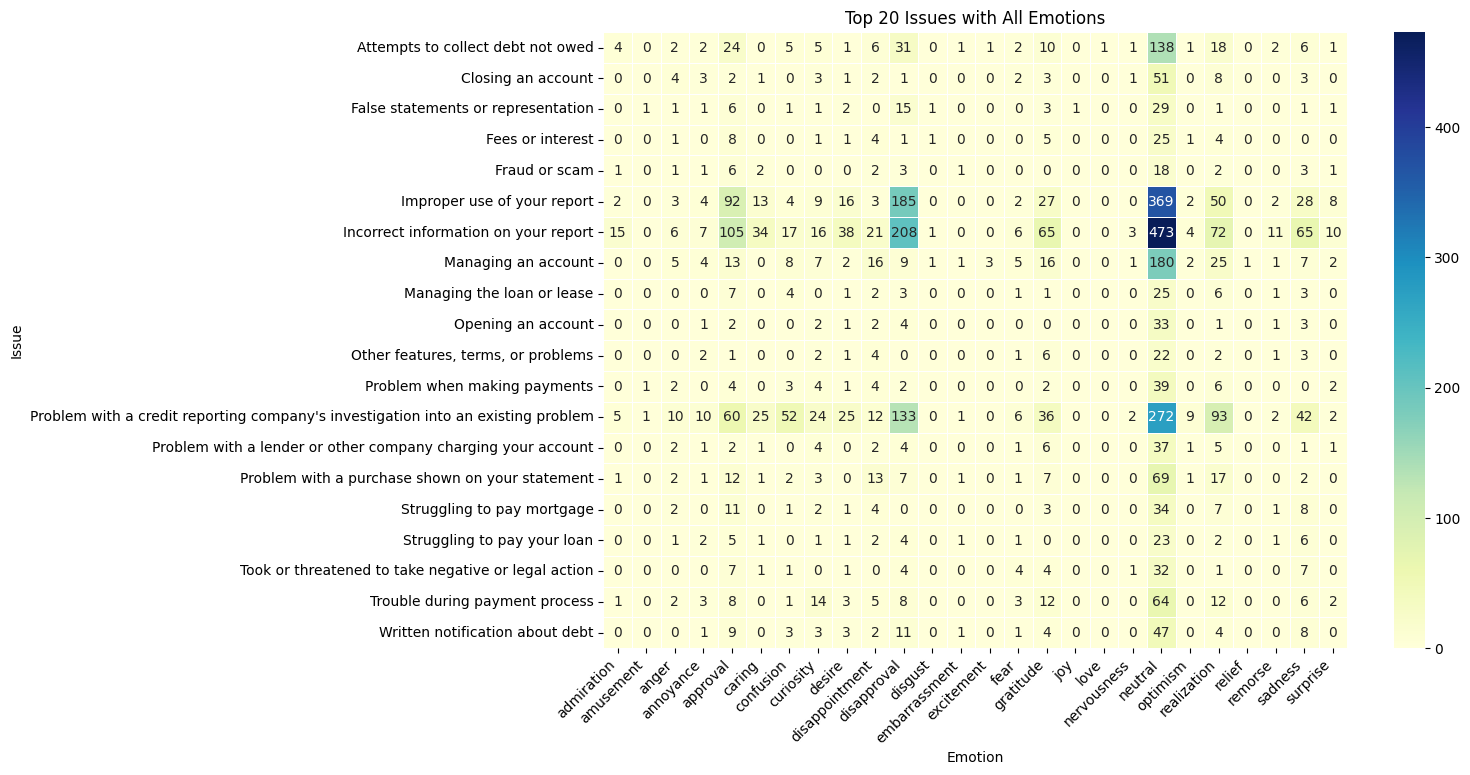

In [74]:
#ISSUE EMOTION MAPPING for top 20 issues without clustering
issue_emotion_counts = data.groupby(['Issue', 'Emotion_1']).size().reset_index(name='Count')

top_10_issues = data['Issue'].value_counts().nlargest(20).index.tolist()


filtered_counts = issue_emotion_counts[issue_emotion_counts['Issue'].isin(top_10_issues)]

heatmap_data = pd.pivot_table(filtered_counts, values='Count', index='Issue', columns='Emotion_1', fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Top 20 Issues with All Emotions')
plt.xlabel('Emotion')
plt.ylabel('Issue')
plt.xticks(rotation=45, ha='right')
plt.show()


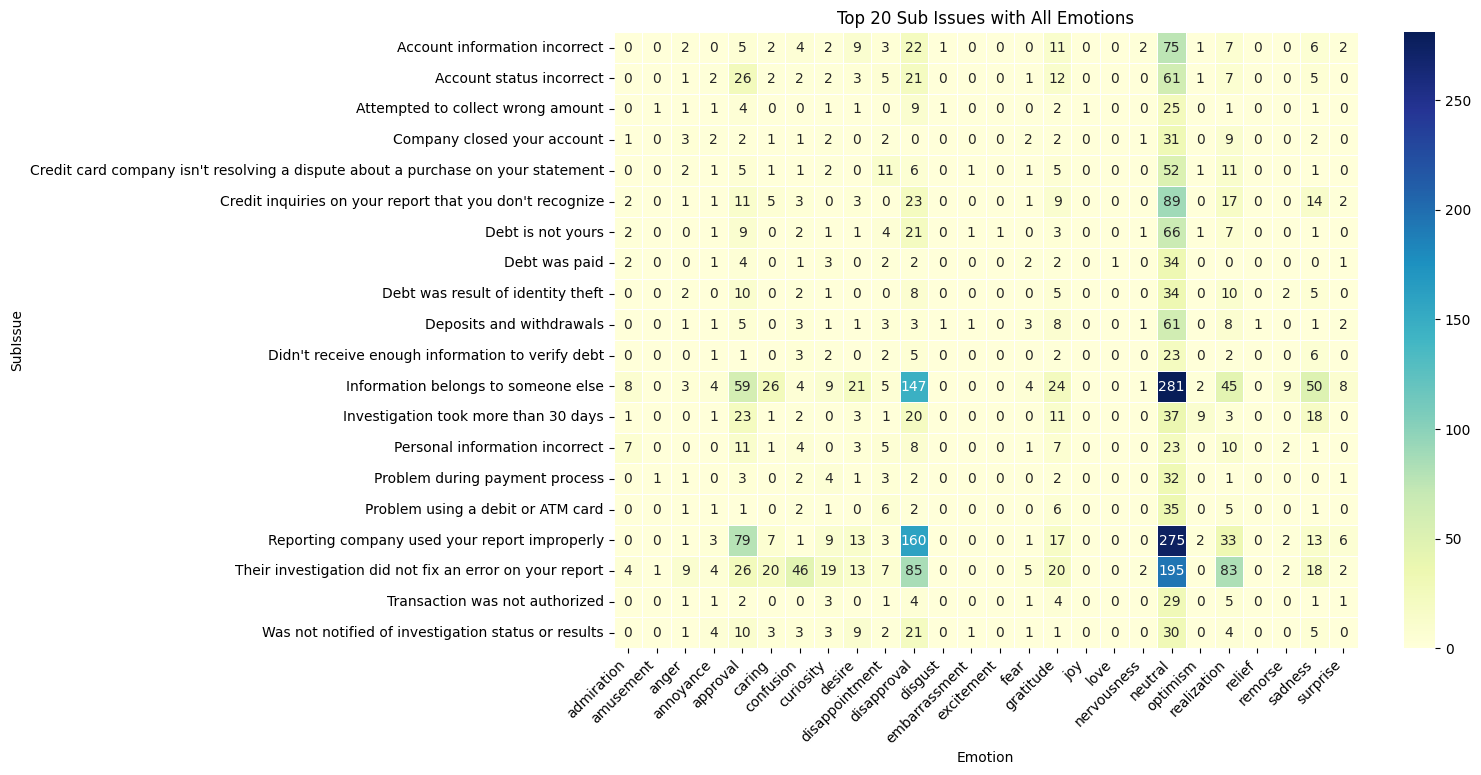

In [72]:

#SUBISSUE EMOTION MAPPING for top 20 sub issues
issue_emotion_counts = data.groupby(['SubIssue', 'Emotion_1']).size().reset_index(name='Count')


top_10_issues = data['SubIssue'].value_counts().nlargest(20).index.tolist()

filtered_counts = issue_emotion_counts[issue_emotion_counts['SubIssue'].isin(top_10_issues)]


heatmap_data = pd.pivot_table(filtered_counts, values='Count', index='SubIssue', columns='Emotion_1', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Top 20 Sub Issues with All Emotions')
plt.xlabel('Emotion')
plt.ylabel('SubIssue')
plt.xticks(rotation=45, ha='right')
plt.show()


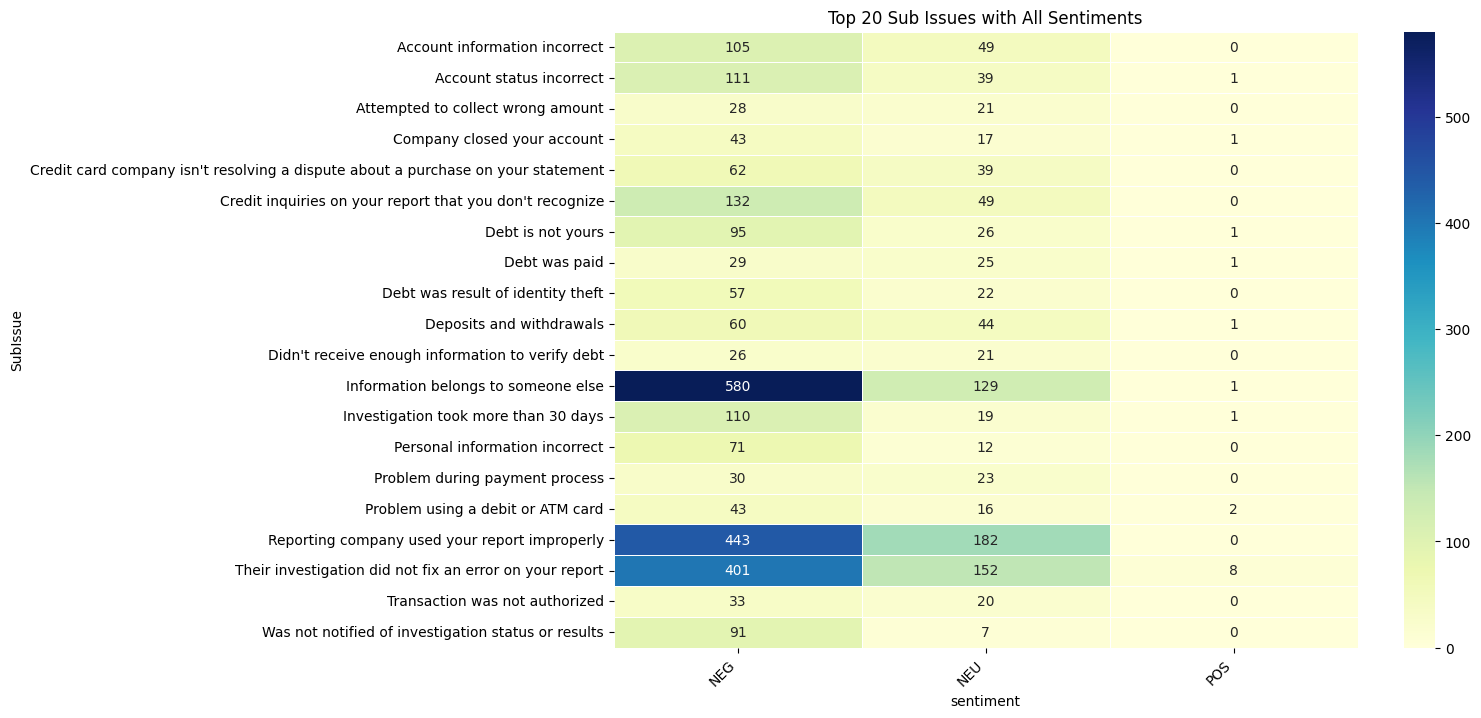

In [75]:
#SUB ISSUE SENTIMENT MAPPING for top 20 sub issues

issue_emotion_counts = cluster_data.groupby(['SubIssue', 'sentiment']).size().reset_index(name='Count')


top_10_issues = cluster_data['SubIssue'].value_counts().nlargest(20).index.tolist()


filtered_counts = issue_emotion_counts[issue_emotion_counts['SubIssue'].isin(top_10_issues)]

heatmap_data = pd.pivot_table(filtered_counts, values='Count', index='SubIssue', columns='sentiment', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Top 20 Sub Issues with All Sentiments')
plt.xlabel('sentiment')
plt.ylabel('SubIssue')
plt.xticks(rotation=45, ha='right')
plt.show()


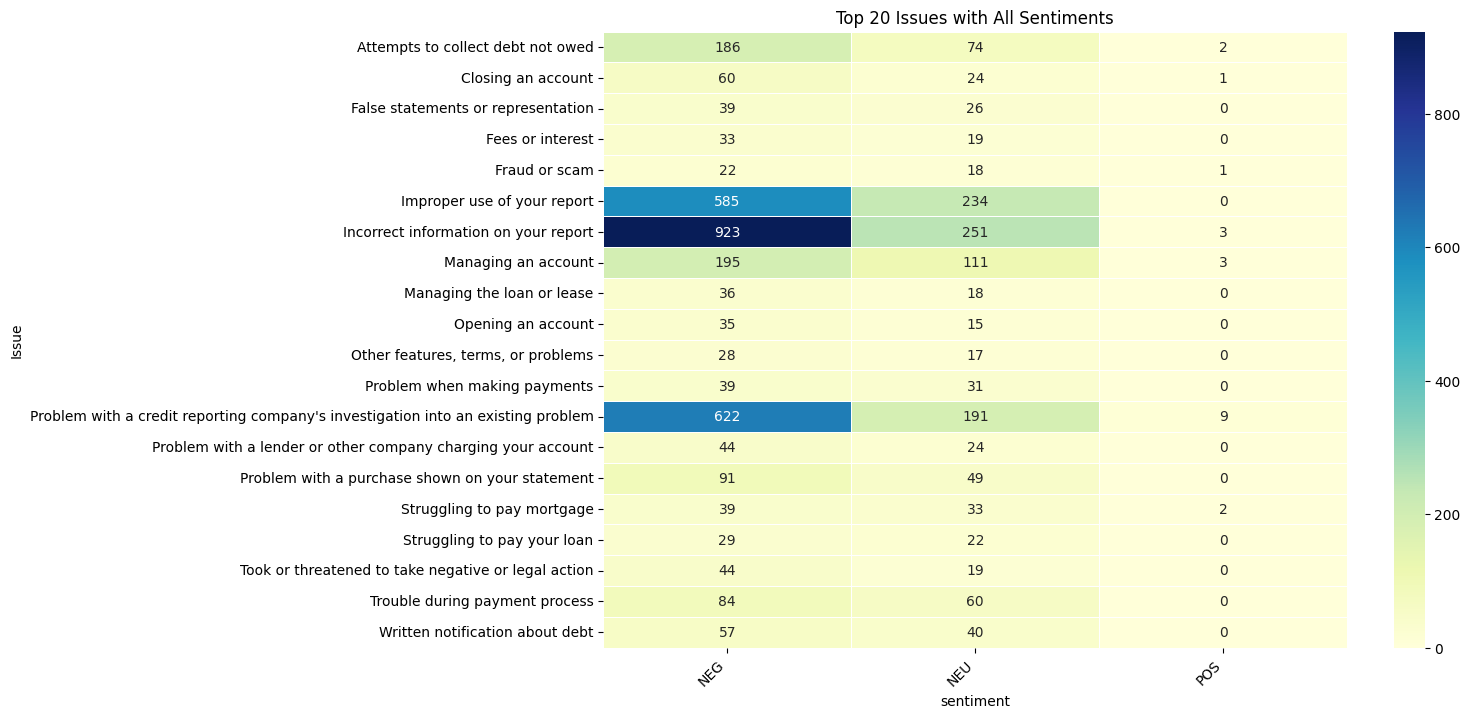

In [76]:
#ISSUE SENTIMENT MAPPING for top 20 issues
issue_emotion_counts = cluster_data.groupby(['Issue', 'sentiment']).size().reset_index(name='Count')

top_10_issues = cluster_data['Issue'].value_counts().nlargest(20).index.tolist()

filtered_counts = issue_emotion_counts[issue_emotion_counts['Issue'].isin(top_10_issues)]

heatmap_data = pd.pivot_table(filtered_counts, values='Count', index='Issue', columns='sentiment', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Top 20 Issues with All Sentiments')
plt.xlabel('sentiment')
plt.ylabel('Issue')
plt.xticks(rotation=45, ha='right')
plt.show()


#Clustering Results Analysis

In [ ]:
#clustering analysis presesnt in clustering.ipynb. Results analysis present here
cluster_data = pd.read_csv('clustering_results_10.csv')

In [ ]:
cluster_data['Cluster'].value_counts()

0    736
5    690
3    679
8    607
1    604
4    460
6    457
2    424
7    180
9    163
Name: Cluster, dtype: int64

In [ ]:
cluster_data.columns

Index(['Unnamed: 0', 'DateReceived', 'Product', 'SubProduct', 'Issue',
       'SubIssue', 'ConsumerComplaintNarrative', 'CompanyPublicResponse',
       'Company', 'State', 'ZIPCode', 'Tags', 'ConsumerConsentProvided',
       'SubmittedVia', 'DateSenttoCompany', 'CompanyResponseToConsumer',
       'TimelyResponse', 'ConsumerDisputed', 'ComplaintID', 'sentiment_score',
       'sentiment', 'polarity', 'Top_3_Emotions', 'TopEmotions_DistillRoberta',
       'Top_Emotions', 'Emotion_1', 'Emotion_2', 'Emotion_3', 'Cluster'],
      dtype='object')

In [ ]:



# Group by 'Group' and calculate the mode of the 'Category' column within each group
grouped_data = cluster_data.groupby('Cluster')['Issue'].apply(lambda x: x.mode().iloc[0])
grouped_data


Cluster
0                    Attempts to collect debt not owed
1                          Improper use of your report
2                                  Managing an account
3                                  Managing an account
4                 Incorrect information on your report
5    Problem with a credit reporting company's inve...
6                                  Managing an account
7                          Improper use of your report
8                 Incorrect information on your report
9                 Incorrect information on your report
Name: Issue, dtype: object

In [ ]:

# Group by 'Group' and calculate the mode of the 'Category' column within each group
grouped_data = cluster_data.groupby('Cluster')['SubIssue'].apply(lambda x: x.mode().iloc[0])
grouped_data

Cluster
0                                    Debt is not yours
1        Reporting company used your report improperly
2                             Deposits and withdrawals
3                                    Debt is not yours
4                        Account information incorrect
5    Their investigation did not fix an error on yo...
6    Credit card company isn't resolving a dispute ...
7        Reporting company used your report improperly
8                  Information belongs to someone else
9                  Information belongs to someone else
Name: SubIssue, dtype: object

In [ ]:
grouped_data = cluster_data.groupby('Cluster')['Product'].value_counts()
most_frequent_categories = grouped_data.groupby(level=0).idxmax()
most_frequent_categories

Cluster
0                                 (0, Debt collection)
1    (1, Credit reporting, credit repair services, ...
2                     (2, Credit card or prepaid card)
3                     (3, Checking or savings account)
4    (4, Credit reporting, credit repair services, ...
5    (5, Credit reporting, credit repair services, ...
6                     (6, Checking or savings account)
7    (7, Credit reporting, credit repair services, ...
8    (8, Credit reporting, credit repair services, ...
9    (9, Credit reporting, credit repair services, ...
Name: Product, dtype: object

In [ ]:
grouped_data = cluster_data.groupby('Cluster')['Issue'].value_counts()
most_frequent_categories = grouped_data.groupby(level=0).idxmax()
most_frequent_categories

Cluster
0               (0, Attempts to collect debt not owed)
1                     (1, Improper use of your report)
2                             (2, Managing an account)
3                             (3, Managing an account)
4            (4, Incorrect information on your report)
5    (5, Problem with a credit reporting company's ...
6                             (6, Managing an account)
7                     (7, Improper use of your report)
8            (8, Incorrect information on your report)
9            (9, Incorrect information on your report)
Name: Issue, dtype: object

In [ ]:
grouped_data = cluster_data.groupby('Cluster')['SubIssue'].value_counts()
most_frequent_categories = grouped_data.groupby(level=0).idxmax()
most_frequent_categories

Cluster
0                               (0, Debt is not yours)
1    (1, Reporting company used your report imprope...
2                        (2, Deposits and withdrawals)
3                               (3, Debt is not yours)
4                   (4, Account information incorrect)
5    (5, Their investigation did not fix an error o...
6    (6, Credit card company isn't resolving a disp...
7    (7, Reporting company used your report imprope...
8             (8, Information belongs to someone else)
9             (9, Information belongs to someone else)
Name: SubIssue, dtype: object


Cluster Comparison for 'Emotion_1':
Cluster           0    1    2    3    4    5    6    7    8    9  Total
Emotion_1                                                              
admiration        5    2    5    0    0    5    0    1   12    4     34
amusement         1    0    2    0    0    1    0    0    0    0      4
anger            23    2    6    0    3   10    0    1    2    1     48
annoyance        33    4    6    0    1    7    0    2    4    2     59
approval         92   69   72    0   10   55    0   23   81   11    413
caring            7    5    6    0    2   24    0    6   22    8     80
confusion        26    4   16    0    1   51    0    0   11    4    113
curiosity        42    9   30    0    4   20    0    1    8    3    117
desire           21   13   15    0    4   17    0    4   22    6    102
disappointment   69    3   22    0    6   12    0    0    9    5    126
disapproval     125  136   50    0   24  119    0   47  143   29    673
disgust           3    0   

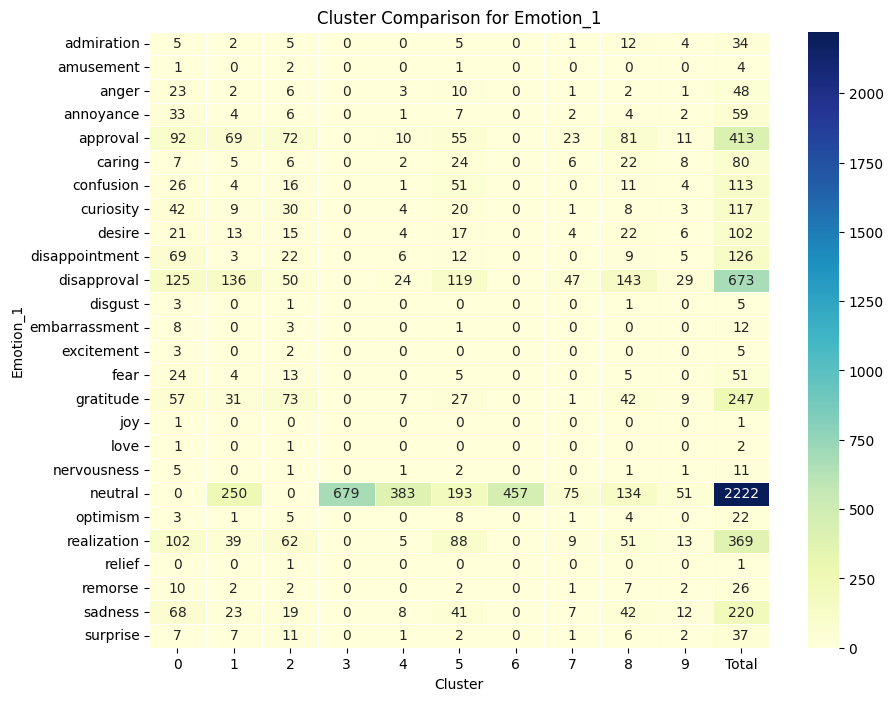

In [ ]:
# Cluster Comparision



# Assuming you have already performed K-Modes clustering and added the 'Cluster' column to the DataFrame 'data'.

# Cross-tabulate categorical features by clusters
#for feature in ['Issue', 'SubIssue', 'Product', 'SubProduct', 'Company', 'sentiment', 'Emotion_1']:
for feature in ['Emotion_1']:
    cross_tab = pd.crosstab(cluster_data[feature], cluster_data['Cluster'], margins=True, margins_name='Total')
    print(f"\nCluster Comparison for '{feature}':")
    print(cross_tab)

    # Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(cross_tab.drop('Total'), annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
    plt.title(f'Cluster Comparison for {feature}')
    plt.show()


In [ ]:
#Sentiment and Emotion Analysis

# Sentiment Analysis
sentiment_proportions = cluster_data.groupby('Cluster')['sentiment'].value_counts(normalize=True).unstack()
print("\nSentiment Analysis:")
print(sentiment_proportions)

# Emotion Analysis
emotion_proportions = cluster_data.groupby('Cluster')['Emotion_1'].value_counts(normalize=True).unstack()
print("\nEmotion Analysis:")
print(emotion_proportions)



Sentiment Analysis:
sentiment       NEG       NEU       POS
Cluster                                
0          0.987772       NaN  0.012228
1          0.725166  0.274834       NaN
2               NaN  1.000000       NaN
3          0.997054       NaN  0.002946
4          0.841304  0.154348  0.004348
5          0.772464  0.215942  0.011594
6               NaN  1.000000       NaN
7          0.800000  0.200000       NaN
8          0.807249  0.189456  0.003295
9          0.815951  0.184049       NaN

Emotion Analysis:
Emotion_1  admiration  amusement     anger  annoyance  approval    caring  \
Cluster                                                                     
0            0.006793   0.001359  0.031250   0.044837  0.125000  0.009511   
1            0.003311        NaN  0.003311   0.006623  0.114238  0.008278   
2            0.011792   0.004717  0.014151   0.014151  0.169811  0.014151   
3                 NaN        NaN       NaN        NaN       NaN       NaN   
4                 

In [85]:
#Examples where emotion predicted was "Approval"

filtered_data = cluster_data[(cluster_data['Emotion_1'] == 'approval') &
                             (cluster_data['SubIssue'].str.contains('Reporting company used your report'))]

sample_data = filtered_data.sample(n=3, random_state=42)

for idx, row in sample_data.iterrows():
    print(f"Example {idx+1}:")
    print(row['ConsumerComplaintNarrative'])
    print()

Example 2478:
My data was involved in various data breaches, XXXX Data Breach, XXXX Data Breach, and Experian Data Breach. I have a number of unauthorized, inaccurate, and imcomplete accounts on my credit report that are hurting my reputation with the banking system. I am looking to get a mortgage very soon and these unauthorized and inaccurate accounts are hurting my chances. I did not consent to any of the unauthorized accounts or inquiries. This is unfair and inaccurate reporting that must be fixed immediately. I demand that you remove all inaccurate accounts immediately. Ive mailed in disputes more than a month ago and I still havent been responded too by the XXXX Experian or XXXX.

Example 51:
The Fair Credit Reporting Act 15 USC 1681 section 602 a states " There is a need to insure that consumer reporting agencies exercise their grave responsibilities with fairness, impartiality, and a respect for the consumers right to privacy. '' XXXX, XXXX and XXXX are consumer reporting agenc

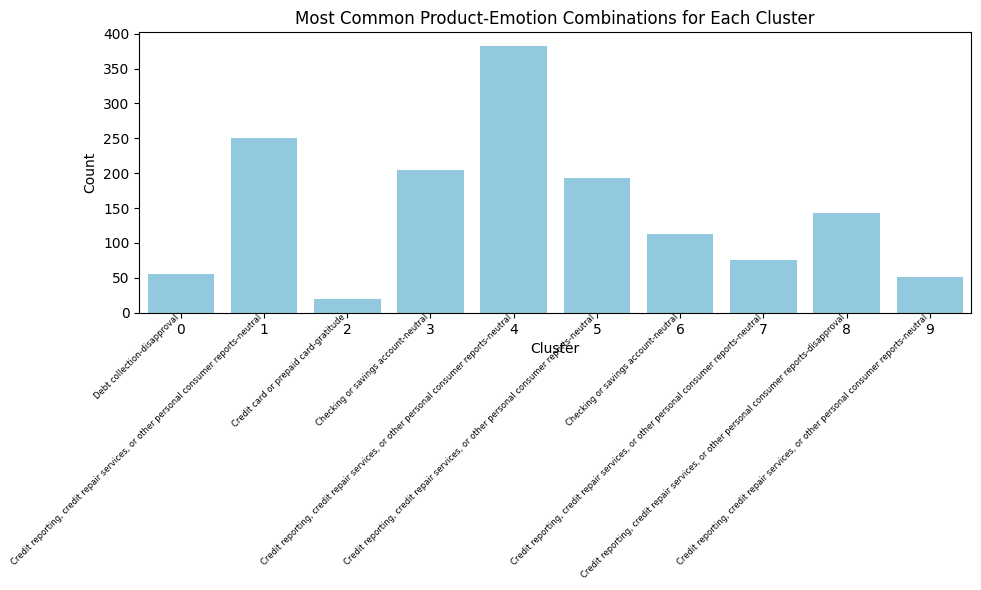

In [109]:
import seaborn as sns

df=cluster_data.copy()
top_10_products = df['Product'].value_counts().nlargest(10).index.tolist()

filtered_df = df[df['Product'].isin(top_10_products)]

cluster_product_emotion_counts = filtered_df.groupby(['Cluster', 'Product', 'Emotion_1']).size().reset_index(name='Count')

cluster_product_emotion_counts['Product_Emotion'] = cluster_product_emotion_counts['Product'] + '-' + cluster_product_emotion_counts['Emotion_1']

most_common_combinations = cluster_product_emotion_counts.groupby('Cluster').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

most_common_combinations = most_common_combinations.sort_values('Cluster')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', data=most_common_combinations, color='skyblue')
plt.title('Most Common Product-Emotion Combinations for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')


for index, row in most_common_combinations.iterrows():
    plt.text(row['Cluster'], -0.2, row['Product_Emotion'], ha='right', va='top', rotation=45, fontsize=6)

plt.ylim(bottom=-0.5)

plt.tight_layout()
plt.show()


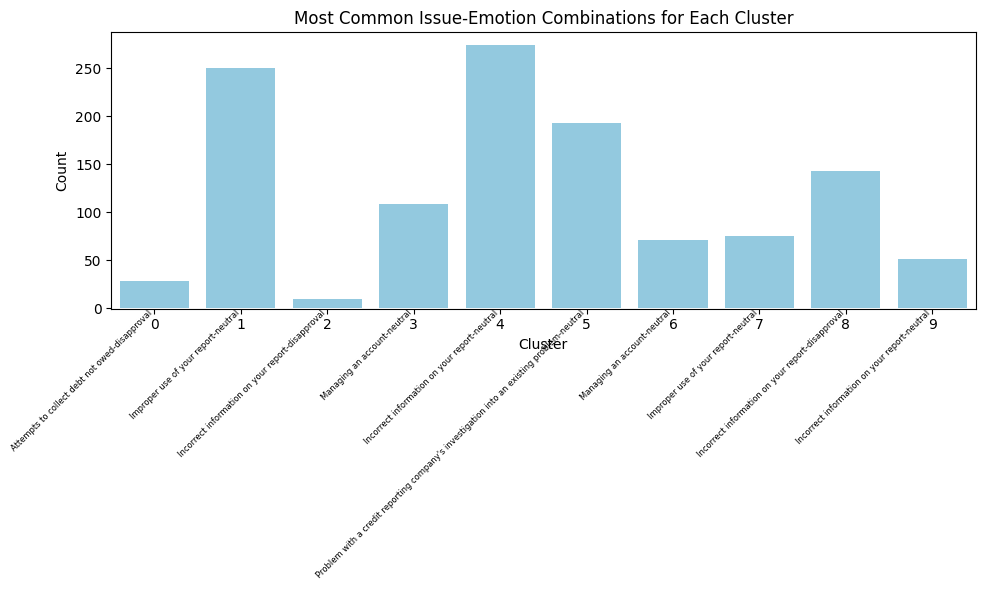

In [110]:

#Repeat process for issue
top_10_products = df['Issue'].value_counts().nlargest(10).index.tolist()

filtered_df = df[df['Issue'].isin(top_10_products)]

cluster_product_emotion_counts = filtered_df.groupby(['Cluster', 'Issue', 'Emotion_1']).size().reset_index(name='Count')

cluster_product_emotion_counts['Issue_Emotion'] = cluster_product_emotion_counts['Issue'] + '-' + cluster_product_emotion_counts['Emotion_1']

most_common_combinations = cluster_product_emotion_counts.groupby('Cluster').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

most_common_combinations = most_common_combinations.sort_values('Cluster')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', data=most_common_combinations, color='skyblue')
plt.title('Most Common Issue-Emotion Combinations for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

for index, row in most_common_combinations.iterrows():
    plt.text(row['Cluster'], -0.2, row['Issue_Emotion'], ha='right', va='top', rotation=45, fontsize=6)

plt.ylim(bottom=-0.5)

plt.tight_layout()
plt.show()


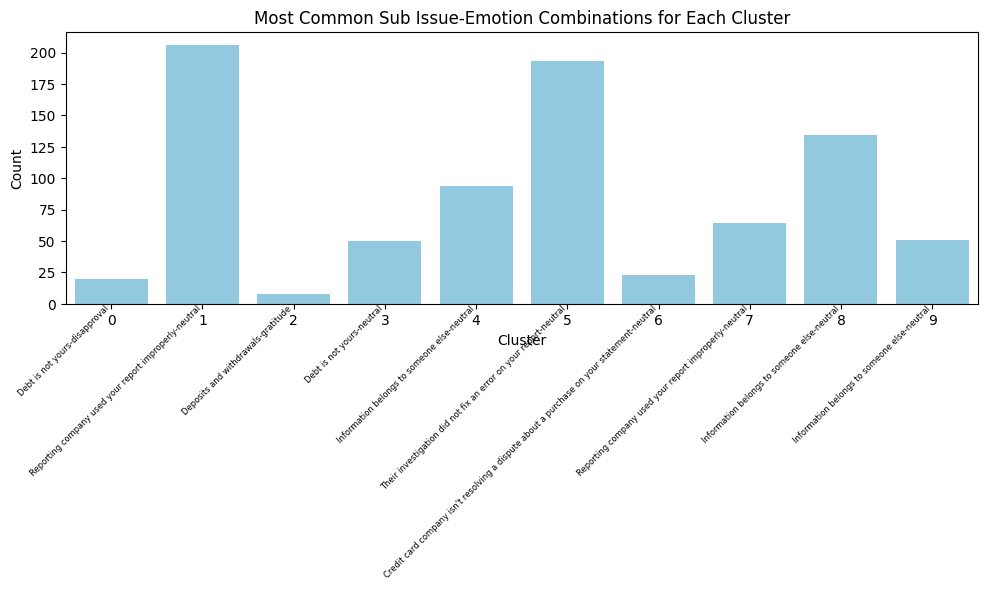

In [112]:
#Repeat process for SubIssue
top_10_products = df['SubIssue'].value_counts().nlargest(10).index.tolist()

filtered_df = df[df['SubIssue'].isin(top_10_products)]

cluster_product_emotion_counts = filtered_df.groupby(['Cluster', 'SubIssue', 'Emotion_1']).size().reset_index(name='Count')

cluster_product_emotion_counts['SubIssue_Emotion'] = cluster_product_emotion_counts['SubIssue'] + '-' + cluster_product_emotion_counts['Emotion_1']

most_common_combinations = cluster_product_emotion_counts.groupby('Cluster').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

most_common_combinations = most_common_combinations.sort_values('Cluster')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', data=most_common_combinations, color='skyblue')
plt.title('Most Common Sub Issue-Emotion Combinations for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

for index, row in most_common_combinations.iterrows():
    plt.text(row['Cluster'], -0.2, row['SubIssue_Emotion'], ha='right', va='top', rotation=45, fontsize=6)

plt.ylim(bottom=-0.5)

plt.tight_layout()
plt.show()
